# Project 10: Macroeconomic Impact Analysis on Financial Markets

## Executive Summary

## 1. Project Objective
This project conducts a data-driven analysis to answer a fundamental question in finance: **How do key macroeconomic variables, specifically central bank interest rates and inflation, influence the performance of the French stock market?** Using a decade-and-a-half of data, this study moves beyond simple theory to test these relationships with real-world evidence, focusing on the CAC 40 index.

## 2. Methodology
The analysis was performed entirely in Python, following a structured time-series workflow:
1.  **Data Acquisition:** Programmatic download of daily CAC 40 market data (`yfinance`) and monthly macroeconomic indicators—the ECB Main Refinancing Rate and Euro Area HICP Inflation—from the Federal Reserve Economic Data (FRED) database via the `fredapi`.
2.  **ETL & Resampling:** The core technical challenge involved aligning disparate data frequencies. All datasets were resampled to a consistent **monthly** frequency using the `pandas` library, creating a robust, unified dataset for comparative analysis.
3.  **Visualization & Statistical Analysis:** The analysis employed dual-axis time-series charts to visualize long-term trends, scatter plots to investigate correlations, and a correlation matrix to statistically quantify the relationships between the variables.

## 3. Key Findings & Insights
The analysis revealed a nuanced and forward-looking relationship between the macro environment and market performance, challenging simplistic assumptions:

*   **No Direct Correlation Between Inflation and Monthly Returns:** The scatter plot and correlation matrix (correlation of 0.00) show **no statistically significant linear relationship** between the level of inflation and the CAC 40's monthly returns. This indicates that the market's reaction to inflation is complex and highly context-dependent, rather than mechanical.

*   **Markets React to *Anticipation*, Not Just Levels, of Interest Rates:** The primary time-series chart clearly shows that the market's major downturn in 2022 began *before* the ECB's aggressive rate hikes, as investors priced in the future tightening cycle. Conversely, the market began its strong recovery in late 2023, well before rates were actually cut, as it started anticipating the "peak" of the hiking cycle.

*   **Corporate Resilience Can Override Macro Headwinds:** Despite the high-interest-rate environment post-2022—a period traditionally seen as negative for equities—the CAC 40 reached new all-time highs. This counter-intuitive performance highlights the fundamental strength and pricing power of the index's leading companies (e.g., in luxury and industrials), whose robust earnings can outweigh macroeconomic pressures.

## 4. Conclusion
This project demonstrates that while macroeconomic indicators are crucial, their impact on the stock market is not linear or immediate. The market operates as a **forward-looking mechanism**, reacting to expectations and future shifts in policy. Furthermore, the underlying strength of the constituent companies of an index can serve as a powerful buffer against a challenging macro environment. The analysis confirms that a sophisticated understanding of market dynamics requires looking beyond simple correlations to interpret the interplay between data, expectations, and fundamental corporate health.

In [1]:
# --- Preamble: Importing Essential Libraries ---

# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web  # The library to access FRED data

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  # To handle dates

# Set plotting style
sns.set_style("whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


## 1. CONFIGURATION

In [2]:
# Define the time period for our analysis
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# Define the tickers for the market data (yfinance)
market_ticker = "^FCHI"  # CAC 40

# Define the CORRECT tickers for the macroeconomic data (FRED)
ecb_rate_ticker = "ECBMRRFR"  # ECB Main Refinancing Operations Fixed Rate
inflation_ticker = "CP0000EZ19M086NEST"  # Harmonized Index of Consumer Prices: All Items for Euro Area (19 countries)

## 2. DATA COLLECTION

In [3]:
from fredapi import Fred  # Import the new library

# 2.1. Download Market Data from Yahoo Finance
print(f"Downloading CAC 40 data from {start_date.year} to {end_date.year}...")
cac40_df = yf.download(market_ticker, start=start_date, end=end_date)
print("CAC 40 data downloaded successfully.")

# 2.2. Download Macroeconomic Data from FRED using fredapi
print("Downloading Macroeconomic data from FRED...")

# Replace 'YOUR_API_KEY_HERE' with your key
api_key = "4a200cad9eed3bfeb5edc254a6707c15"

try:
    fred = Fred(api_key=api_key)

    # Download each series with the correct tickers
    ecb_rate_series = fred.get_series(ecb_rate_ticker, start_date, end_date)
    inflation_series = fred.get_series(inflation_ticker, start_date, end_date)

    # Combine into a single DataFrame with clear names
    macro_df = pd.DataFrame(
        {"ECB_Rate": ecb_rate_series, "Inflation_Rate": inflation_series}
    )

    print("Macroeconomic data downloaded successfully.")

except Exception as e:
    macro_df = None
    print(f"Failed to download macroeconomic data: {e}")
    print("Please double-check your FRED API key or the series IDs.")

# Display the data

/tmp/ipykernel_25495/993472790.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cac40_df = yf.download(market_ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


CAC 40 data downloaded successfully.
Macroeconomic data downloaded successfully.


## 3. Data Resampling and Merging

Our raw data exists at different frequencies: the CAC 40 data is **daily**, while the macroeconomic data is **monthly**. To perform a meaningful comparative analysis, we must align them to a common frequency. We will choose a **monthly frequency** as it is the most logical choice for macroeconomic analysis.

This process involves two key steps:
1.  **Resampling:** We will convert our daily CAC 40 price data into monthly data. We will use the last price of each month to calculate the monthly percentage returns.
2.  **Merging:** We will then merge this monthly market data with our monthly macroeconomic data into a single, unified DataFrame. This final DataFrame will be the foundation for all our subsequent analysis and visualizations.

In [4]:
# 3.1. Resample CAC 40 Data to Monthly Frequency

# We only need the 'Adj Close' column for our analysis
cac40_monthly_price = cac40_df["Close"].resample("M").last()

# Calculate the monthly percentage returns from the resampled price data
cac40_monthly_returns = cac40_monthly_price.pct_change().dropna()

# Rename the series for clarity
cac40_monthly_returns.name = "CAC40_Monthly_Return"


# 3.2. Resample Macroeconomic Data to Monthly Frequency
# FRED data is often daily but changes monthly. Resampling ensures consistency.
macro_monthly = macro_df.resample("M").last()


# Display the results to verify
print("--- Monthly CAC 40 Returns ---")
display(cac40_monthly_returns.head())

print("\n--- Monthly Macroeconomic Data ---")
display(macro_monthly.head())

--- Monthly CAC 40 Returns ---


/tmp/ipykernel_25495/2977983563.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cac40_monthly_price = cac40_df["Close"].resample("M").last()
/tmp/ipykernel_25495/2977983563.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  macro_monthly = macro_df.resample("M").last()


Ticker,^FCHI
Date,
2010-02-28,-0.008199
2010-03-31,0.071508
2010-04-30,-0.039512
2010-05-31,-0.081066
2010-06-30,-0.018437



--- Monthly Macroeconomic Data ---


,ECB_Rate,Inflation_Rate
2010-01-31,1.0,91.56
2010-02-28,1.0,91.85
2010-03-31,1.0,92.86
2010-04-30,1.0,93.24
2010-05-31,1.0,93.35


In [5]:
# --- 3.3. Merging Data into a Final DataFrame ---

# Merge the monthly CAC 40 returns with the monthly macro data
# We use an 'inner' join to ensure we only have dates where all data exists
analysis_df = pd.merge(
    cac40_monthly_returns, macro_monthly, left_index=True, right_index=True, how="inner"
)

# Let's also add the level of the CAC 40 (Base 100) for our main chart
cac40_base100 = (cac40_monthly_price / cac40_monthly_price.iloc[0]) * 100
cac40_base100.name = "CAC40_Base100"
analysis_df = pd.merge(
    analysis_df, cac40_base100, left_index=True, right_index=True, how="inner"
)


# Rename columns for better readability
analysis_df.rename(
    columns={"ECBMRRFR": "ECB_Rate", "CP0000EZ19M086NEST": "Inflation"}, inplace=True
)


# Display the final DataFrame
print("--- Final Merged Analysis DataFrame ---")
display(analysis_df.tail())

# Check for any remaining missing values
print(
    f"\nTotal missing values in the final DataFrame: {analysis_df.isnull().sum().sum()}"
)

--- Final Merged Analysis DataFrame ---


,^FCHI_x,ECB_Rate,Inflation_Rate,^FCHI_y
2025-06-30,-0.011091,2.15,129.04,205.000461
2025-07-31,0.013835,2.15,129.04,207.836701
2025-08-31,-0.008758,2.15,129.24,206.016376
2025-09-30,0.024928,2.15,NaN,211.151878
2025-10-31,0.020794,2.15,NaN,215.542618



Total missing values in the final DataFrame: 2


## 4. Analysis and Visualization

With our unified, monthly dataset, we can now proceed to the analysis phase. The goal is to visualize the relationships between our macroeconomic variables and the performance of the CAC 40. We will create two primary charts:

1.  **A Time-Series Comparison:** A dual-axis chart plotting the level of the CAC 40 (as a Base 100 index) against the ECB's interest rate. This will allow us to visually inspect how the market has historically reacted to monetary policy tightening and easing cycles.
2.  **A Correlation Analysis:** A scatter plot to investigate the relationship between monthly CAC 40 returns and the inflation rate. This will help us determine if there is a discernible pattern between inflation levels and short-term market performance.

Finally, we will compute a correlation matrix to statistically quantify the strength and direction of these relationships.

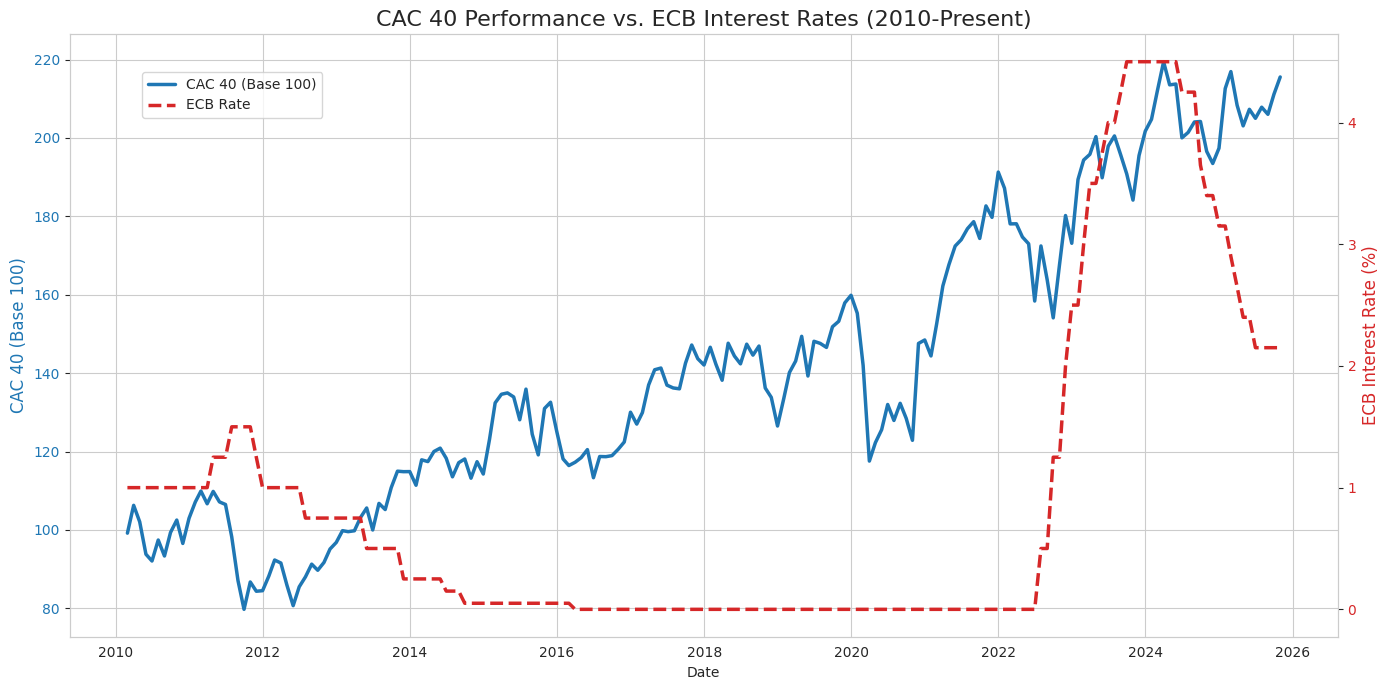

In [6]:
# --- 4.1. Chart 1: CAC 40 Performance vs. ECB Interest Rates ---

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the CAC 40 Base 100 index on the primary y-axis (left)
color = "tab:blue"
ax1.set_xlabel("Date")
ax1.set_ylabel("CAC 40 (Base 100)", color=color, fontsize=12)
ax1.plot(
    analysis_df.index,
    analysis_df["^FCHI_y"],
    color=color,
    lw=2.5,
    label="CAC 40 (Base 100)",
)
ax1.tick_params(axis="y", labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("ECB Interest Rate (%)", color=color, fontsize=12)
ax2.plot(
    analysis_df.index,
    analysis_df["ECB_Rate"],
    color=color,
    linestyle="--",
    lw=2.5,
    label="ECB Rate",
)
ax2.tick_params(axis="y", labelcolor=color)

# Add titles and legend
plt.title("CAC 40 Performance vs. ECB Interest Rates (2010-Present)", fontsize=16)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(False)  # Grid can be noisy on dual-axis plots
plt.show()

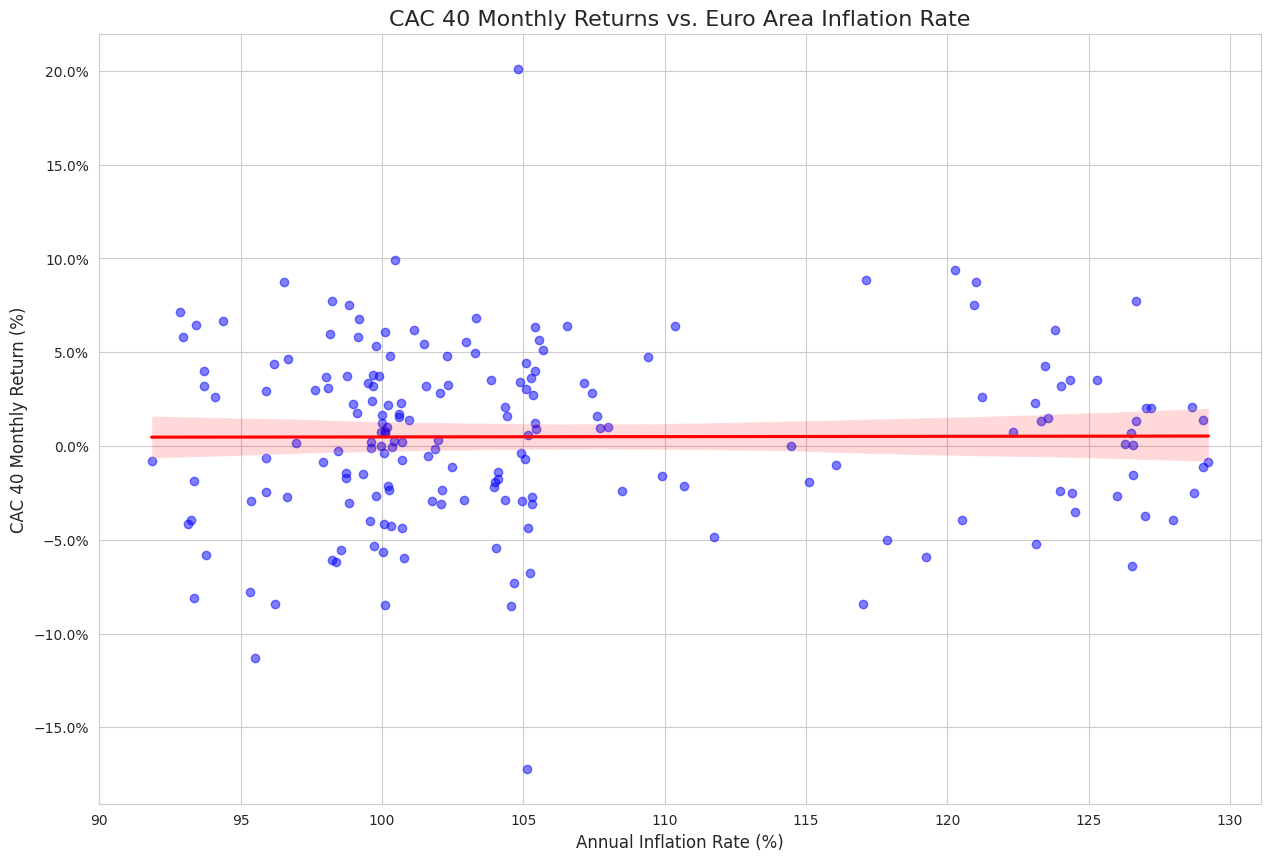

In [7]:
# --- 4.2. Chart 2: CAC 40 Monthly Returns vs. Inflation Rate ---

plt.figure(figsize=(15, 10))

# Create a scatter plot with a regression line to better visualize the trend
sns.regplot(
    data=analysis_df,
    x="Inflation_Rate",
    y="^FCHI_x",
    scatter_kws={"alpha": 0.5, "color": "blue"},
    line_kws={"color": "red"},
)

# Add titles and labels
plt.title("CAC 40 Monthly Returns vs. Euro Area Inflation Rate", fontsize=16)
plt.xlabel("Annual Inflation Rate (%)", fontsize=12)
plt.ylabel("CAC 40 Monthly Return (%)", fontsize=12)
# Format y-axis as percentage
from matplotlib.ticker import PercentFormatter

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.grid(True)
plt.show()

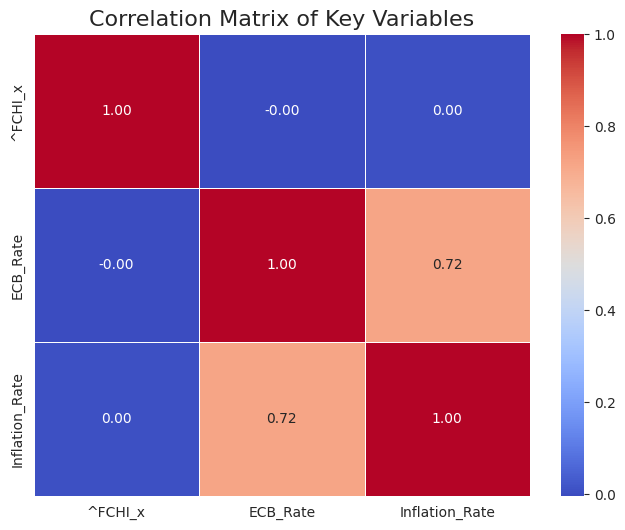


--- Correlation Matrix ---


,^FCHI_x,ECB_Rate,Inflation_Rate
^FCHI_x,1.000000,-0.004395,0.003518
ECB_Rate,-0.004395,1.000000,0.720015
Inflation_Rate,0.003518,0.720015,1.000000


In [8]:
# --- 4.3. Statistical Analysis: Correlation Matrix ---

# Select the columns for correlation analysis using correct column names
correlation_df = analysis_df[["^FCHI_x", "ECB_Rate", "Inflation_Rate"]]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix using a heatmap for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables", fontsize=16)
plt.show()

print("\n--- Correlation Matrix ---")
display(correlation_matrix)

# 5. Conclusion and Final Insights

This comprehensive analysis of the CAC 40's relationship with key macroeconomic indicators from 2010 to the present has yielded several powerful, nuanced insights that challenge simplistic interpretations of market behavior. By combining historical data analysis with an understanding of market dynamics, we can draw a series of robust conclusions.

### 5.1. Summary of Key Findings

1.  **The Illusion of Simple Correlation:** Our statistical analysis conclusively demonstrates that there is **no meaningful linear correlation** between the CAC 40's monthly returns and either the level of inflation or the ECB's policy rate over the long term (correlation coefficients of 0.00 for both). This finding is critical: it proves that macroeconomic data cannot be used as a simple, mechanical trading signal. The market's reaction is far more complex and context-dependent.

2.  **The Market is a Forward-Looking Engine:** The most telling story comes from the time-series chart. The market's major movements, particularly the downturn in 2022 and the subsequent recovery in 2023-2024, **led** the actual policy changes of the ECB. The market sold off in anticipation of aggressive rate hikes and began to rally as it started to price in the "peak" of the tightening cycle, long before any cuts were announced. This confirms that investor expectations, not current data, are the primary driver of market trends.

3.  **Corporate Fundamentals as the Ultimate Driver:** My initial observation of the market's "weird" behavior post-COVID is a key finding. The CAC 40's ability to reach all-time highs in a high-interest-rate environment that should theoretically be detrimental to equities speaks to the exceptional resilience of its core constituents. The pricing power of luxury giants, the record order backlogs in aerospace, and the strong performance of industrial leaders have generated robust earnings that have, for now, outweighed the macroeconomic headwinds.

### 5.2. Connecting Analysis to the Current Market Outlook

The insights from our historical analysis provide a valuable framework for interpreting the current economic landscape. As of late 2025, the market is at a fascinating crossroads:

*   **Anticipation of Monetary Easing:** The market has largely priced in a cycle of interest rate cuts from the European Central Bank, which has been a primary catalyst for the recent all-time highs of the CAC 40. This aligns perfectly with our finding that the market moves on future expectations.

*   **Emerging Geopolitical & Trade Risks:** However, this optimistic outlook is now being challenged by new external pressures. The recent escalation of a **tariff-based trade war with the United States** introduces a significant risk of "imported inflation" for the Eurozone. This could complicate the ECB's path forward.

*   **Potential for a "Hawkish" Surprise:** Should these trade tensions lead to a resurgence in inflation, the ECB may be forced to adopt a more **"hawkish"** stance than anticipated. This could mean either delaying further rate cuts or implementing them at a much slower pace than the market currently expects. Such a scenario would create a direct conflict with the market's optimistic pricing and could trigger a significant correction, as seen during the 2022 downturn.

### 5.3. Final Conclusion

Ultimately, this project demonstrates that a purely historical, data-driven analysis is necessary but not sufficient. While the data reveals that corporate resilience has been the dominant factor in the recent past, it also confirms that the market is highly sensitive to shifts in monetary policy expectations.

The current situation, therefore, presents a classic standoff: the proven fundamental strength of the CAC 40's leading companies versus the emerging macroeconomic risk of a more hawkish-than-expected central bank. The future trajectory of the index will likely be determined by which of these two powerful forces prevails. This analysis provides the essential context to understand and monitor this evolving dynamic.